In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from network import Sequential, costfunc, regularization_term, output_class


2022-02-05 17:30:44.133890: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-05 17:30:44.133930: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


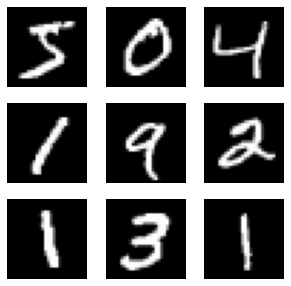

In [2]:
from tensorflow import keras
from keras.datasets import mnist
from matplotlib import pyplot
 
#loading
(X_train_full, y_train_full), (X_test_full, y_test_full) = mnist.load_data()


y = np.zeros((np.size(y_train_full),10))
X = np.zeros((len(X_train_full),784))

for i in range(np.size(y_train_full)):
    y[i,y_train_full[i]] = 1
    X[i] = np.reshape(X_train_full[i]/255.,784)

fig= plt.figure(figsize=(5,5))
axes = []
for i in range(9):
    axes.append(fig.add_subplot(3,3,i+1)) 
    plt.imshow(X[i].reshape((28,28)), cmap=plt.get_cmap('gray'))
    axes[i].axis('off')
plt.show()


In [20]:

# Create training-set of 4800 instances
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.92, random_state=42)
layer_dims = [784, 26, 10]
eps_init = 0.12


# Random weights
weights= [
            np.random.uniform(-eps_init, eps_init, (layer_dims[i + 1], layer_dims[i] + 1))
            for i in range(len(layer_dims) -1)
        ]
model = Sequential(layer_dims, weights)
alpha = 1 # Regularization parameter
n_epochs = 30
b_size = len(y_train) # Full batch size
mb_size = int(len(X_train)/100) # Mini-batch size
print('Mini-batch size:', len(X_train))


for ie in range(n_epochs):
    eta =   1.0 - 0.9*ie/n_epochs # Learning rate
    
    for ib in range(0,b_size,mb_size): # Stochastic gradient decent
    
        model.zero_gradients()
        
        X_mb = X_train[ib:ib+mb_size]
        y_mb = y_train[ib:ib+mb_size]

        y_pred = np.array(list(map(model, X_mb, y_mb)))
        y_out = np.array(list(map(output_class,y_pred)))
        
        model.make_gradients(alpha, mb_size)
        
        scores = [np.allclose(youti,yi) for youti, yi in zip(y_out,y_mb)]
        accuracy = sum(scores)/mb_size
        cost = sum(costfunc(yi, y_predi) for yi, y_predi in zip(y_mb, y_pred))
        reg_term = regularization_term(model.weights, alpha)
        cost += reg_term
        cost /= mb_size

        for i in range(model.n_weights):
            model.weights[i] -= eta*model.gradients[i] 

        if ib/mb_size % 20 == 0:
            print(f"Epoch: {ie},Minibatch: {ib/mb_size}, cost {cost}, accuracy {accuracy*100}%")

Mini-batch size: 4800
Epoch: 0,Minibatch: 0.0, cost 7.874699988697475, accuracy 12.5%
Epoch: 0,Minibatch: 20.0, cost 3.490184574195515, accuracy 43.75%
Epoch: 0,Minibatch: 40.0, cost 2.941531493347677, accuracy 43.75%
Epoch: 0,Minibatch: 60.0, cost 2.60622547161978, accuracy 68.75%
Epoch: 0,Minibatch: 80.0, cost 2.441182190748007, accuracy 64.58333333333334%
Epoch: 1,Minibatch: 0.0, cost 2.5754316994576487, accuracy 72.91666666666666%
Epoch: 1,Minibatch: 20.0, cost 2.54957449360004, accuracy 64.58333333333334%
Epoch: 1,Minibatch: 40.0, cost 2.450783723208322, accuracy 72.91666666666666%
Epoch: 1,Minibatch: 60.0, cost 2.385669913590026, accuracy 75.0%
Epoch: 1,Minibatch: 80.0, cost 2.273667366831534, accuracy 83.33333333333334%
Epoch: 2,Minibatch: 0.0, cost 2.493342839810419, accuracy 79.16666666666666%
Epoch: 2,Minibatch: 20.0, cost 2.5062186981402372, accuracy 66.66666666666666%
Epoch: 2,Minibatch: 40.0, cost 2.3941403560436556, accuracy 79.16666666666666%
Epoch: 2,Minibatch: 60.0, co

In [23]:
# Test the trained model
batch_size = 1000
y_pred = np.array(list(map(model.propagate_forward, X_test[:batch_size])))
y_out = np.array(list(map(output_class,y_pred)))
scores = [np.allclose(youti,ytesti) for youti, ytesti in zip(y_out,y_test[:batch_size])]
accuracy = sum(scores)/batch_size
print(f"accuracy {accuracy*100}%")

accuracy 84.2%


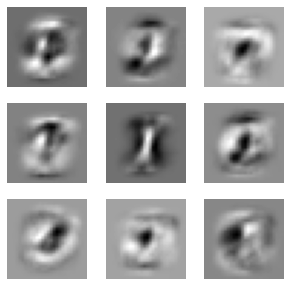

In [24]:
# Visualize hidden layers

fig= plt.figure(figsize=(5,5))
axes = []
for i in range(9):
    axes.append(fig.add_subplot(3,3,i+1)) 
    plt.imshow(model.weights[0][i,1:].reshape((28,28)), cmap=plt.get_cmap('gray'))
    axes[i].axis('off')
plt.show()